In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score


C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#################################################################################################
#                                 DATA EXPLORATION                                              #
#################################################################################################

In [4]:
count_emp_left = np.count_nonzero(data.left == 1)
count_emp_promote = np.count_nonzero(data.promotion_last_5years == 1)
count_emp_accidents = np.count_nonzero(data.Work_accident == 1)
percent_emp_left = float(count_emp_left)/float(data.shape[0])*100

print count_emp_left, "employees left the company, which is equiavlent to {:.2f}% of the total workforce".format(percent_emp_left)
print count_emp_promote, "employees have been promoted within last 5 years"
print count_emp_accidents, "employees had an accident at work"

3571 employees left the company, which is equiavlent to 23.81% of the total workforce
319 employees have been promoted within last 5 years
2169 employees had an accident at work


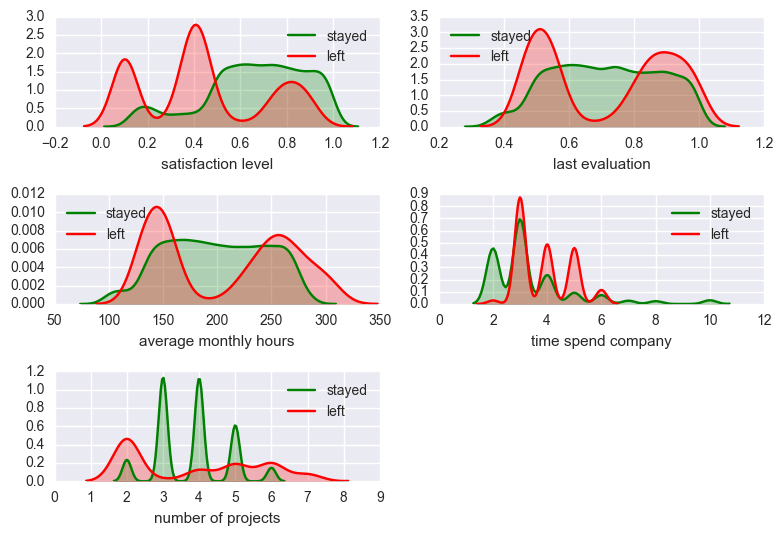

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)


sns.kdeplot(data[data.left==0].satisfaction_level,shade=True,color='green',label='stayed',ax=ax1)
sns.kdeplot(data[data.left==1].satisfaction_level,shade=True,color='red',label='left',ax=ax1)
ax1.set(xlabel="satisfaction level")


sns.kdeplot(data[data.left==0].last_evaluation,shade=True,color='green',label='stayed',ax=ax2)
sns.kdeplot(data[data.left==1].last_evaluation,shade=True,color='red',label='left',ax=ax2)
ax2.set(xlabel="last evaluation")

sns.kdeplot(data[data.left==0].average_montly_hours,shade=True,color='green',label='stayed',ax=ax3)
sns.kdeplot(data[data.left==1].average_montly_hours,shade=True,color='red',label='left',ax=ax3)
ax3.set(xlabel="average monthly hours")

sns.kdeplot(data[data.left==0].time_spend_company,shade=True,color='green',label='stayed',ax=ax4)
sns.kdeplot(data[data.left==1].time_spend_company,shade=True,color='red',label='left',ax=ax4)
ax4.set(xlabel="time spend company")

sns.kdeplot(data[data.left==0].number_project,shade=True,color='green',label='stayed',ax=ax5)
sns.kdeplot(data[data.left==1].number_project,shade=True,color='red',label='left',ax=ax5)
ax5.set(xlabel="number of projects")

plt.tight_layout()
plt.show()


In [6]:
#From the plots above, we can see that the relationships are not linear.
#Those with low satisfaction levels were more likely to leave.
#However, there is an increase in the density at a satisfaction level of around 0.8.
#Those who worked either a small number of hours (~140) or a very large number of hours (~260) were more likely to leave
#Those with low evaluation and those with high evaluations were more likely to leave
#Those spending 3 years or more in the company were more likely to leave


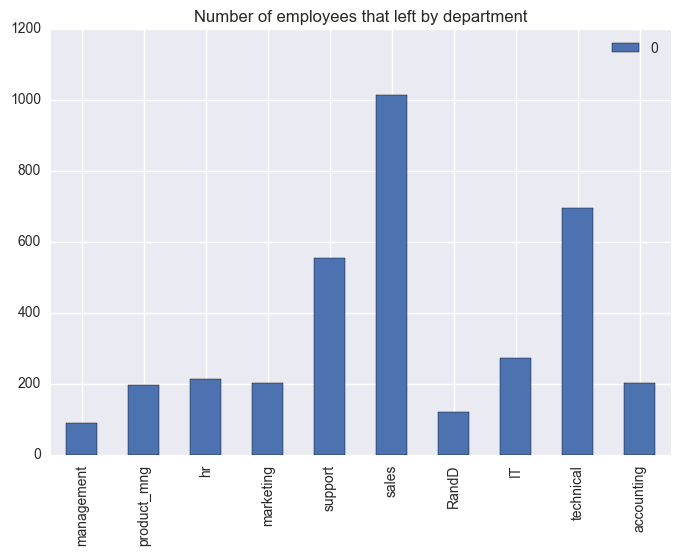

In [7]:
emp_left = data[data.left == 1]
emp_left_dat = pd.get_dummies(emp_left)
emp_stay = data[data.left == 0]
emp_stay_dat = pd.get_dummies(emp_stay)

from collections import Counter as ct
data1 = emp_left["sales"]
departments_count = ct(data1)
df = pd.DataFrame.from_dict(departments_count, orient='index')
df.plot(kind='bar')
plt.title("Number of employees that left by department")
plt.show()

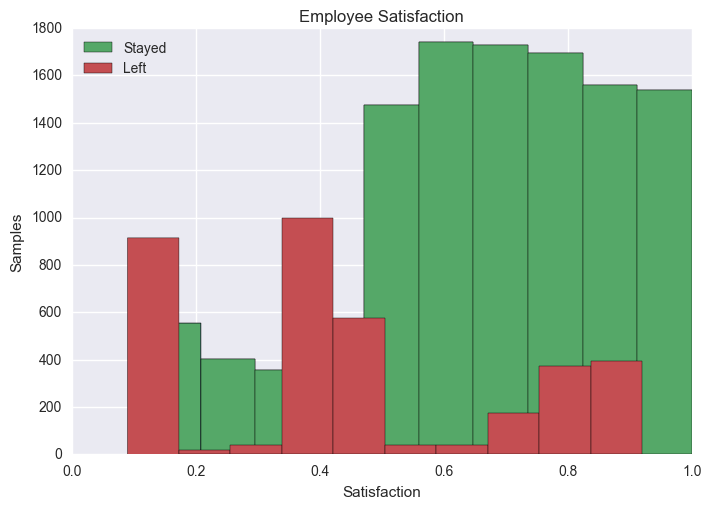

In [9]:
data1 = emp_stay_dat["satisfaction_level"]
data2= emp_left_dat["satisfaction_level"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Employee Satisfaction")
plt.xlabel('Satisfaction')
plt.ylabel('Samples')
legend = plt.legend(loc='upper left', shadow=True)
plt.show()

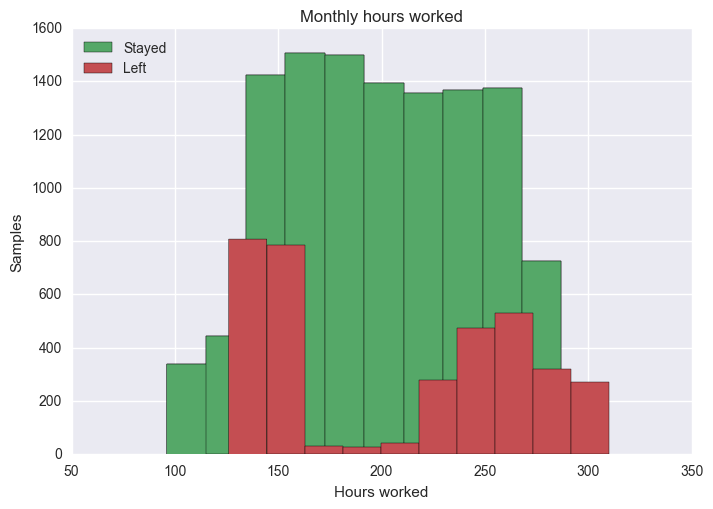

In [11]:
data1 = emp_stay_dat["average_montly_hours"]
data2= emp_left_dat["average_montly_hours"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Monthly hours worked")
plt.xlabel('Hours worked')
plt.ylabel('Samples')
legend = plt.legend(loc='upper left', shadow=True)
plt.show()

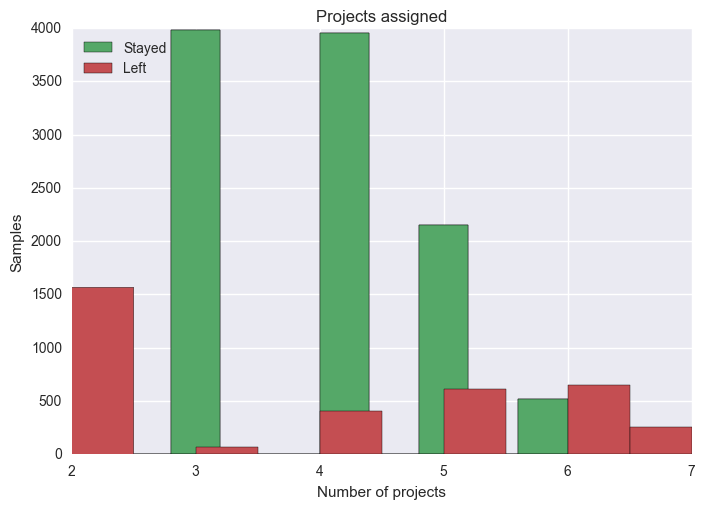

In [13]:
data1 = emp_stay_dat["number_project"]
data2= emp_left_dat["number_project"]
plt.hist(data1, label='Stayed')
plt.hist(data2, label='Left')
plt.title("Projects assigned")
plt.xlabel('Number of projects')
plt.ylabel('Samples')
legend = plt.legend(loc='upper left', shadow=True)
plt.show()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64


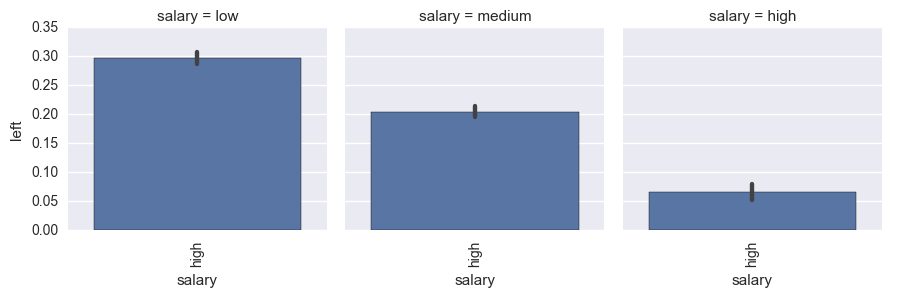

In [14]:
print(data.salary.value_counts())
g = sns.FacetGrid(data,col='salary')
g = g.map(sns.barplot,'salary','left')
g.set_xticklabels(rotation=90)
g.add_legend()
plt.show()

0    12830
1     2169
Name: Work_accident, dtype: int64


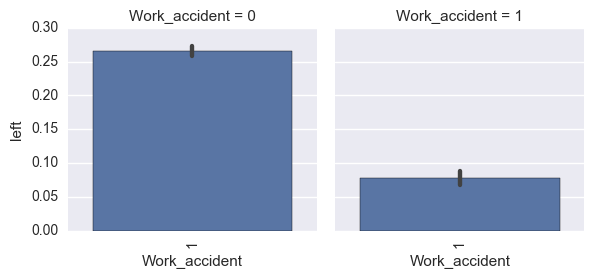

In [15]:
print(data.Work_accident.value_counts())
g = sns.FacetGrid(data,col='Work_accident')
g = g.map(sns.barplot,'Work_accident','left')
g.set_xticklabels(rotation=90)
g.add_legend()
plt.show()

0    14680
1      319
Name: promotion_last_5years, dtype: int64


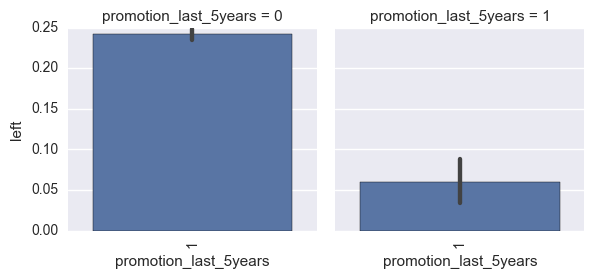

In [16]:
print(data.promotion_last_5years.value_counts())
g = sns.FacetGrid(data,col='promotion_last_5years')
g = g.map(sns.barplot,'promotion_last_5years','left')
g.set_xticklabels(rotation=90)
g.add_legend()
plt.show()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64


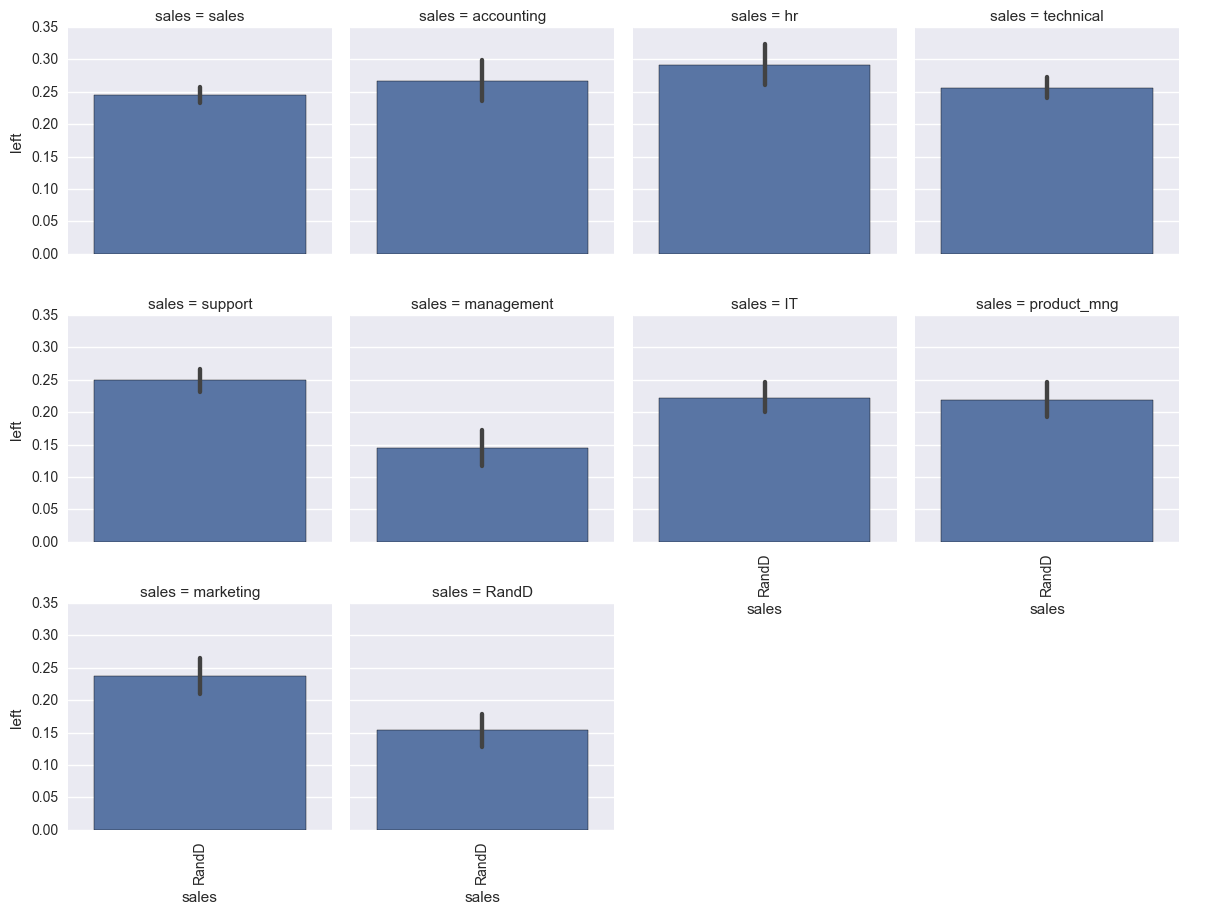

In [17]:
print(data.sales.value_counts())
g = sns.FacetGrid(data,col='sales',col_wrap=4)
g = g.map(sns.barplot,'sales','left')
g.set_xticklabels(rotation=90)
g.add_legend()
plt.show()

In [18]:
#From the above distributions we can conclude that:
#Low salary workers are more likely to leave
#Those who had a work accident are less likely to leave
#Those who were promoted in the past 5 years are less likely to leave
#Those in management and R&D are less likely to leave

In [19]:
#################################################################################################
#                                     DATA PREPRATION                                           #
#################################################################################################

In [20]:
# Now, I wanted to convert the ‘satisfaction_level’ and ‘last_evaluation’ into categorical variables 
# because the categorical variables allow you to capture much more complicated relationships 
# rather than continuous variables which estimates the linear component of a relationship.
# So, I performed binning on these variables by creating 3 bins for each having low, med and high values.
# Next, I wanted to see the relationship between each of new variables created by performing binning


In [21]:
data['eval_bin'] = pd.cut(data.last_evaluation,bins=3,labels=['low eval','med eval','high eval'])
data['satisf_bin'] = pd.cut(data.satisfaction_level,bins=3,labels=['low satisfy','med satisfy','high satisfy'])
#print(data.loc[data.satisfaction_cat=='med satisfaction','satisfaction_level'].describe())

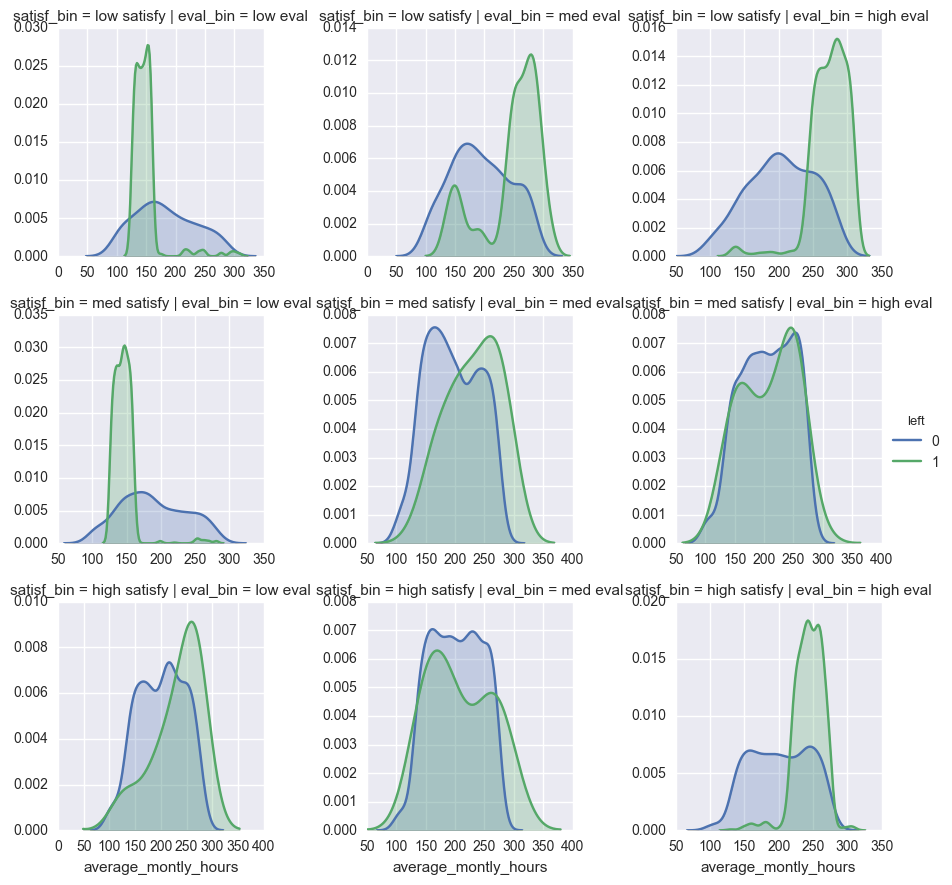

In [22]:
g = sns.FacetGrid(data,col='eval_bin',row='satisf_bin',hue='left',sharex=False,sharey=False)
g = g.map(sns.kdeplot,'average_montly_hours',shade=True)
g.add_legend()
plt.show()

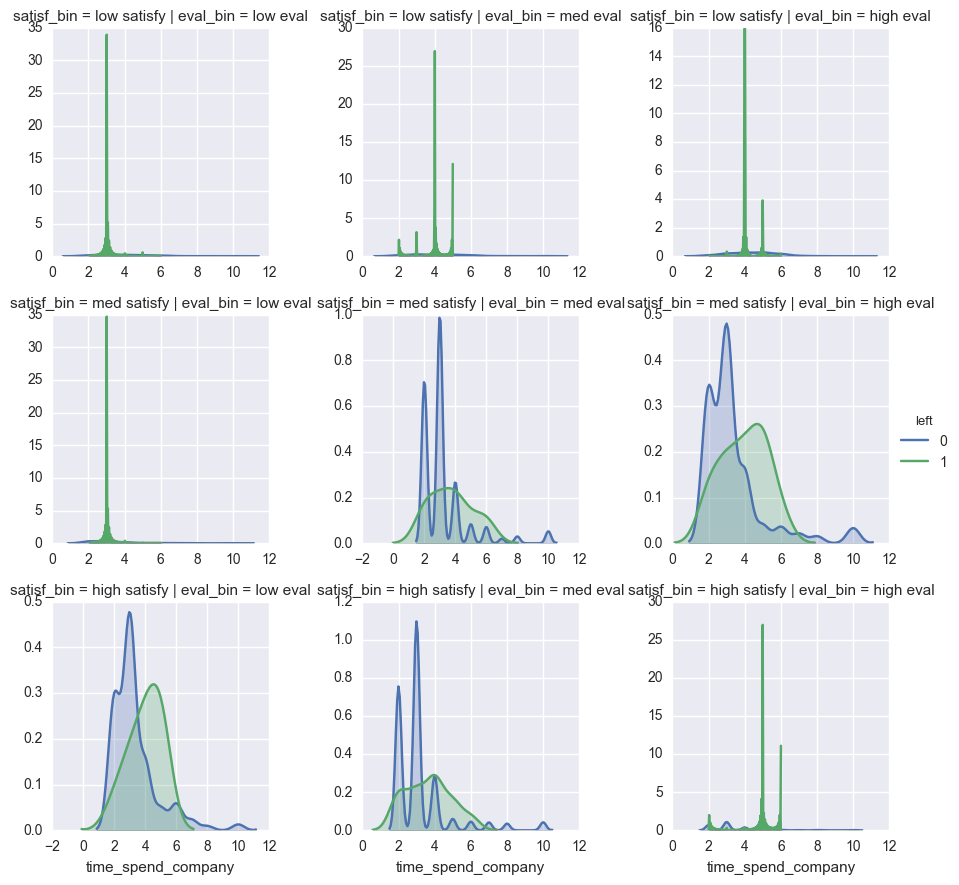

In [23]:
g = sns.FacetGrid(data,col='eval_bin',row='satisf_bin',hue='left',sharex=False,sharey=False)
g = g.map(sns.kdeplot,'time_spend_company',shade=True)
g.add_legend()
plt.show()

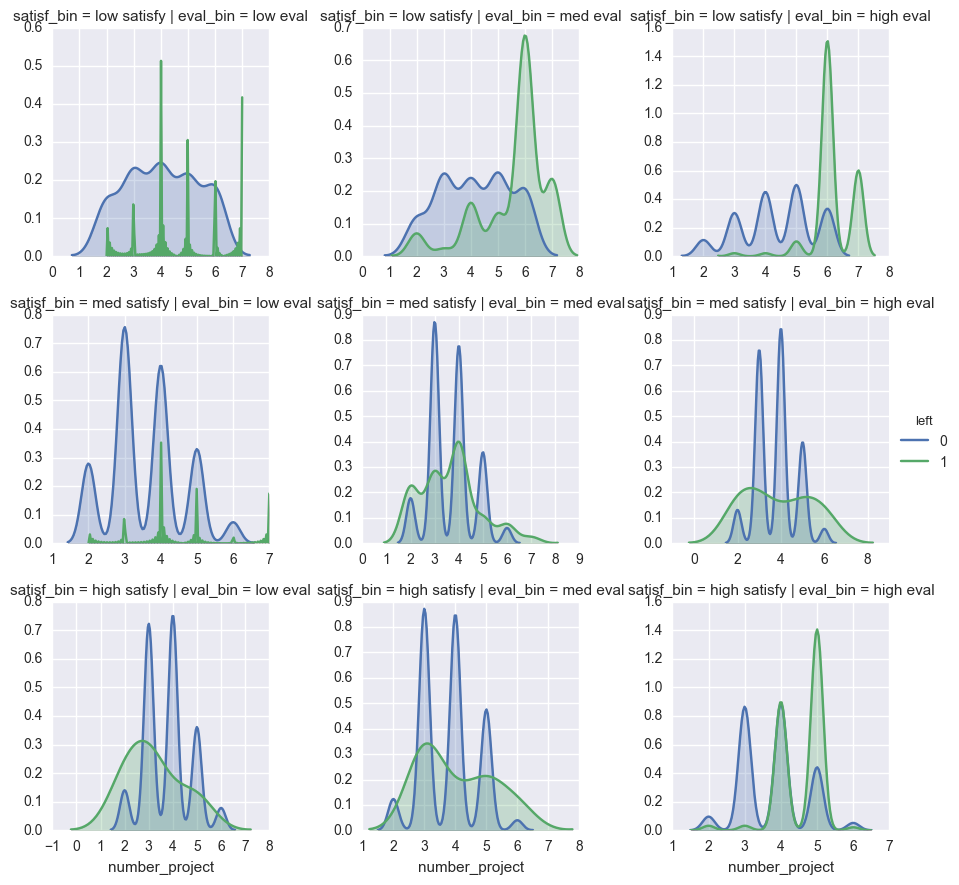

In [24]:
g = sns.FacetGrid(data,col='eval_bin',row='satisf_bin',hue='left',sharex=False,sharey=False)
g = g.map(sns.kdeplot,'number_project',shade=True)
g.add_legend()
plt.show()

In [25]:
#Conclusions from above plots

#Average monthly hours:
#low/med satisfaction and low eval: those working less hours are more likely to leave.
#The pattern changes for high satisfaction, where distributions overlap and those who worked more hours were more likely to leave
#Those with low satisfaction and med/high evaluations were more likely to leave if they worked for many hours
#Those with high evaluation and high satisfaction were more likely to leave if they worked more hours.

#Time spent at the company: there is an overlap for all categories

#Number of projects: overall, the distributions overlap. But those with low satisfaction and med/high eval
#and high satisfaction with high evaluation were more likely to leave if they had a large number of projects

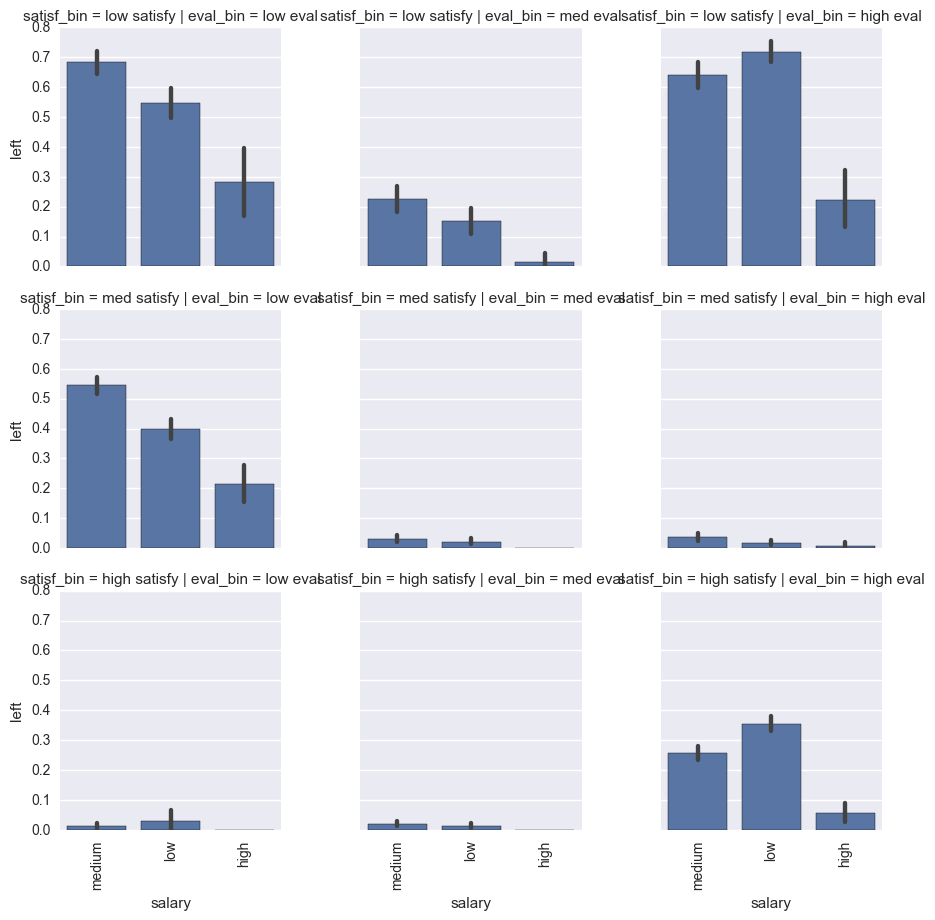

In [26]:
g = sns.FacetGrid(data,col='eval_bin',row = 'satisf_bin')
g = g.map(sns.barplot,'salary','left')
g.set_xticklabels(rotation=90)
g.add_legend()
plt.show()

In [27]:
#Based on the patterns showed above, separating the evaluation and satisfaction into categories and
#interacting them with hours spend and number of projects could improve tha predictions

In [28]:
#################################################################################################
#                                 Feature Engineering                                           #
#################################################################################################

In [29]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,eval_bin,satisf_bin
0,0.38,0.53,2,157,3,0,1,0,sales,low,low eval,low satisfy
1,0.80,0.86,5,262,6,0,1,0,sales,medium,high eval,high satisfy
2,0.11,0.88,7,272,4,0,1,0,sales,medium,high eval,low satisfy
3,0.72,0.87,5,223,5,0,1,0,sales,low,high eval,high satisfy
4,0.37,0.52,2,159,3,0,1,0,sales,low,low eval,low satisfy


In [30]:
# Add dummy variables
data = pd.get_dummies(data)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_technical,salary_high,salary_low,salary_medium,eval_bin_low eval,eval_bin_med eval,eval_bin_high eval,satisf_bin_low satisfy,satisf_bin_med satisfy,satisf_bin_high satisfy
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
del data['satisfaction_level']
del data['last_evaluation']

In [32]:
data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,...,sales_technical,salary_high,salary_low,salary_medium,eval_bin_low eval,eval_bin_med eval,eval_bin_high eval,satisf_bin_low satisfy,satisf_bin_med satisfy,satisf_bin_high satisfy
0,2,157,3,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5,262,6,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,272,4,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,5,223,5,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2,159,3,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
data.columns

Index([u'number_project', u'average_montly_hours', u'time_spend_company',
       u'Work_accident', u'left', u'promotion_last_5years', u'sales_IT',
       u'sales_RandD', u'sales_accounting', u'sales_hr', u'sales_management',
       u'sales_marketing', u'sales_product_mng', u'sales_sales',
       u'sales_support', u'sales_technical', u'salary_high', u'salary_low',
       u'salary_medium', u'eval_bin_low eval', u'eval_bin_med eval',
       u'eval_bin_high eval', u'satisf_bin_low satisfy',
       u'satisf_bin_med satisfy', u'satisf_bin_high satisfy'],
      dtype='object')

In [34]:
#Creating new features
data['var1'] = data['satisf_bin_high satisfy']*data['eval_bin_high eval']*data['average_montly_hours']
data['var2'] = data['satisf_bin_low satisfy']*data['eval_bin_med eval']*data['number_project']
data['var3'] = data['satisf_bin_low satisfy']*data['eval_bin_high eval']*data['number_project']
data['var4'] = data['satisf_bin_low satisfy']*data['eval_bin_low eval']*data['average_montly_hours']
data['var5'] = data['satisf_bin_med satisfy']*data['eval_bin_low eval']*data['average_montly_hours']

In [35]:
data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,...,eval_bin_med eval,eval_bin_high eval,satisf_bin_low satisfy,satisf_bin_med satisfy,satisf_bin_high satisfy,var1,var2,var3,var4,var5
0,2,157,3,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,157.0,0.0
1,5,262,6,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,262.0,0.0,0.0,0.0,0.0
2,7,272,4,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
3,5,223,5,0,1,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,223.0,0.0,0.0,0.0,0.0
4,2,159,3,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,159.0,0.0


In [36]:
#################################################################################################
#                                 Model Building                                                #
#################################################################################################

In [37]:
target = data['left']
features = data.drop('left', axis = 1)

classifiers = [('rfg', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('rfe', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('ada', AdaBoostClassifier()),
               ('extf', ExtraTreesClassifier(n_jobs=-1)),
               ('knn', KNeighborsClassifier(n_jobs=-1)),
               ('dt', DecisionTreeClassifier()),
               ('Et', ExtraTreeClassifier()),
               ('Logit', LogisticRegression()),
               ('gnb', GaussianNB()),
               ('bnb', BernoulliNB()),
              ]
allscores = []
for name, classifier in classifiers:
    scores = []
    for i in range(3): # three runs
        roc = cross_val_score(classifier, features, target, scoring='roc_auc', cv=20)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)

('rfg', 0.98828445072255811)
('rfe', 0.9876745719487573)
('ada', 0.97352862616975366)
('extf', 0.9860926431265582)
('knn', 0.97883910745508518)
('dt', 0.97285499947743104)
('Et', 0.96210932718108177)
('Logit', 0.92813413609950823)
('gnb', 0.86516751503446954)
('bnb', 0.83649577419812471)


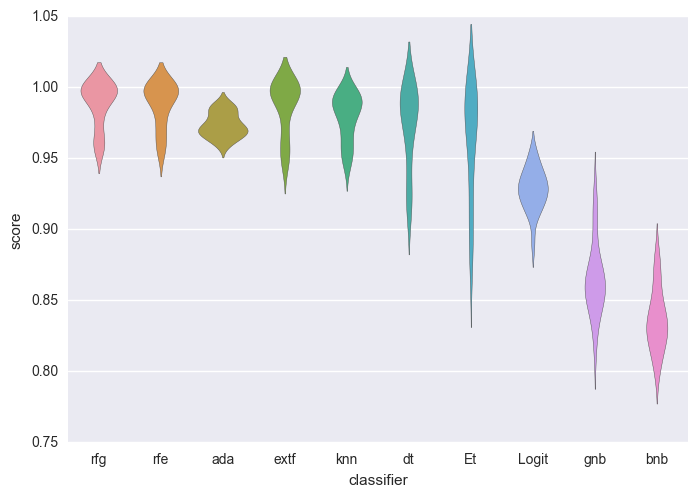

In [38]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.show()

In [39]:
# I'll choose Random Forest as our classifier of choice because it has high ROCAUC and low variation in the CV. 
# Also, it is it is fast and fairly insensitive to tuning.